<a href="https://colab.research.google.com/github/arturbernardo/benfords_law_2022/blob/main/Benford_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos votos das eleições de 2022 na perspectiva da lei de Benford.

https://en.wikipedia.org/wiki/Benford%27s_law

---



**Importate**: A lei de benford não serve para comprovar irregularidades em eleições. No entanto ela é uma interessante ferramenta de busca por anomalias. Essa análise faz parte de uma série de análises feitas por mim, em nenhuma delas eu encontrei nada suspeito.

In [54]:
import pandas as pd
import plotly.express as px
from google.colab import drive
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
pd.options.display.max_columns = None


In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [85]:
all = pd.DataFrame()

# states = ['AC', 'AL', 'AM', 'AP', 'DF', 'ES', 'MA', 'MS', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'SC', 'SE', 'ZZ', 'TO', 'SP', 'RS', 'CE', 'GO', 'BA']
states = ['RS']

for state in states:
  st = pd.read_csv('/content/drive/MyDrive/data/eleicoes2022unziped/bweb_2t_'+state+'_311020221535.csv', encoding="ISO-8859-1", sep = ';',
                   dtype={
                            "SG_UF": pd.CategoricalDtype(),
                            "CD_MUNICIPIO": pd.Int64Dtype(),
                            "NR_LOCAL_VOTACAO": pd.Int64Dtype(),
                            "NR_ZONA": pd.Int64Dtype(),
                            "NR_SECAO": pd.CategoricalDtype(),
                            "QT_VOTOS": pd.StringDtype()
                        })

  st_presidente = st[st.CD_CARGO_PERGUNTA == 1]
  filtered_df = st_presidente.loc[(st_presidente['NR_PARTIDO'] == 13) | (st_presidente['NR_PARTIDO'] == 22)]

  toUnion = [all, filtered_df]

  all = pd.concat(toUnion)

all


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
1,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,88013,PORTO ALEGRE,1,1,1422,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:34:54,355,282,73,1,APURADA,1,Nominal,22,JAIR BOLSONARO,108,2215453,787.689.897.600.495.174.,531.998,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:50,9,30/10/2022 17:03:19,-1,-1
3,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,88013,PORTO ALEGRE,1,1,1422,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:34:54,355,282,73,1,APURADA,1,Nominal,13,LULA,155,2215453,787.689.897.600.495.174.,531.998,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:50,9,30/10/2022 17:03:19,-1,-1
9,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,88013,PORTO ALEGRE,1,2,1325,1,Presidente,22,PL,Partido Liberal,30/10/2022 17:55:33,358,272,86,1,APURADA,1,Nominal,22,JAIR BOLSONARO,89,2213088,615.972.839.183.819.874.,377.991,A9CA01B1,22/09/2022 14:19:00,1 - 2,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:40,15,30/10/2022 17:04:09,-1,-1
11,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,88013,PORTO ALEGRE,1,2,1325,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:55:33,358,272,86,1,APURADA,1,Nominal,13,LULA,172,2213088,615.972.839.183.819.874.,377.991,A9CA01B1,22/09/2022 14:19:00,1 - 2,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:40,15,30/10/2022 17:04:09,-1,-1
16,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,88013,PORTO ALEGRE,1,3,1376,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:12:03,402,302,100,1,APURADA,1,Nominal,22,JAIR BOLSONARO,149,2196928,848.295.171.906.504.961.,324.874,A9CA01B1,22/09/2022 14:20:00,1 - 3,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:17,4,30/10/2022 17:02:50,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215854,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,86835,GRAVATAÍ,173,288,1236,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:35:35,396,325,71,1,APURADA,1,Nominal,22,JAIR BOLSONARO,127,2148034,765.267.388.686.161.748.,759.652,5C334FD1,22/09/2022 14:48:00,1 - 288,#NULO#,30/10/2022 08:01:37,30/10/2022 17:04:50,6,30/10/2022 17:06:58,-1,-1
215860,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,86835,GRAVATAÍ,173,290,1139,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:23:53,84,67,17,1,APURADA,1,Nominal,13,LULA,28,2150460,149.005.148.824.077.802.,290.353,5C334FD1,23/09/2022 11:36:00,1 - 290,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:19,2,30/10/2022 17:01:31,-1,-1
215861,31/10/2022,15:51:32,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,RS,86835,GRAVATAÍ,173,290,1139,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:23:53,84,67,17,1,APURADA,1,Nominal,22,JAIR BOLSONARO,35,2150460,149.005.148.824.077.802.,290.353,5C334FD1,23/09/2022 11:36:00,1 - 290,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:19,2,30/10/2022 17:01:31,-1,-1
215867,31/10/2022,15:51:32,2022,0,Eleição Ordinária,40

In [86]:
df2 = all[['NR_LOCAL_VOTACAO',
                   'CD_MUNICIPIO',
                   'NR_ZONA',
                   'NR_SECAO',
                   'QT_VOTOS',
                   'QT_APTOS',
                   'QT_COMPARECIMENTO',
                   'CD_CARGO_PERGUNTA',
                   'NR_PARTIDO',
                   'NM_MUNICIPIO',
                   'SG_UF']]

In [87]:
df_lula = df2.loc[(df2['NR_PARTIDO'] == 13)]

df_bolsonaro = df2.loc[(df2['NR_PARTIDO'] == 22)]

In [ ]:
df_lula

In [97]:
df_lula_1 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('1', na=False)]
df_lula_2 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('2', na=False)]
df_lula_3 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('3', na=False)]
df_lula_4 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('4', na=False)]
df_lula_5 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('5', na=False)]
df_lula_6 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('6', na=False)]
df_lula_7 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('7', na=False)]
df_lula_8 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('8', na=False)]
df_lula_9 = df_lula.loc[df_lula['QT_VOTOS'].astype(str).str.startswith('9', na=False)]

df_bolsonaro_1 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('1', na=False)]
df_bolsonaro_2 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('2', na=False)]
df_bolsonaro_3 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('3', na=False)]
df_bolsonaro_4 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('4', na=False)]
df_bolsonaro_5 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('5', na=False)]
df_bolsonaro_6 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('6', na=False)]
df_bolsonaro_7 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('7', na=False)]
df_bolsonaro_8 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('8', na=False)]
df_bolsonaro_9 = df_bolsonaro.loc[df_bolsonaro['QT_VOTOS'].astype(str).str.startswith('9', na=False)]

# print(df_lula_1.size)
# print(df_lula_2.size)
# print(df_lula_3.size)
# print(df_lula_4.size)
# print(df_lula_5.size)
# print(df_lula_6.size)
# print(df_lula_7.size)
# print(df_lula_8.size)
# print(df_lula_9.size)


In [93]:
total_lula = df_lula_1.size + df_lula_2.size + df_lula_3.size + df_lula_4.size + df_lula_5.size + df_lula_6.size + df_lula_7.size + df_lula_8.size + df_lula_9.size
total_lula

299200

In [94]:
percent_lula_1 = df_lula_1.size * 100 / total_lula
percent_lula_2 = df_lula_2.size * 100 / total_lula
percent_lula_3 = df_lula_3.size * 100 / total_lula
percent_lula_4 = df_lula_4.size * 100 / total_lula
percent_lula_5 = df_lula_5.size * 100 / total_lula
percent_lula_6 = df_lula_6.size * 100 / total_lula
percent_lula_7 = df_lula_7.size * 100 / total_lula
percent_lula_8 = df_lula_8.size * 100 / total_lula
percent_lula_9 = df_lula_9.size * 100 / total_lula

cem = percent_lula_1 + percent_lula_2 + percent_lula_3 + percent_lula_4 + percent_lula_5 + percent_lula_6 + percent_lula_7 + percent_lula_8 + percent_lula_9
cem # (tem de dar 100% a soma)

99.99999999999999

In [98]:
total_bolsonaro = df_bolsonaro_1.size + df_bolsonaro_2.size + df_bolsonaro_3.size + df_bolsonaro_4.size + df_bolsonaro_5.size + df_bolsonaro_6.size + df_bolsonaro_7.size + df_bolsonaro_8.size + df_bolsonaro_9.size
total_bolsonaro

299189

In [99]:
percent_bolsonaro_1 = df_bolsonaro_1.size * 100 / total_bolsonaro
percent_bolsonaro_2 = df_bolsonaro_2.size * 100 / total_bolsonaro
percent_bolsonaro_3 = df_bolsonaro_3.size * 100 / total_bolsonaro
percent_bolsonaro_4 = df_bolsonaro_4.size * 100 / total_bolsonaro
percent_bolsonaro_5 = df_bolsonaro_5.size * 100 / total_bolsonaro
percent_bolsonaro_6 = df_bolsonaro_6.size * 100 / total_bolsonaro
percent_bolsonaro_7 = df_bolsonaro_7.size * 100 / total_bolsonaro
percent_bolsonaro_8 = df_bolsonaro_8.size * 100 / total_bolsonaro
percent_bolsonaro_9 = df_bolsonaro_9.size * 100 / total_bolsonaro

cem = percent_bolsonaro_1 + percent_bolsonaro_2 + percent_bolsonaro_3 + percent_bolsonaro_4 + percent_bolsonaro_5 + percent_bolsonaro_6 + percent_bolsonaro_7 + percent_bolsonaro_8 + percent_bolsonaro_9
cem # (tem de dar 100% a soma)

100.00000000000001

# `POR URNAS, LULA`

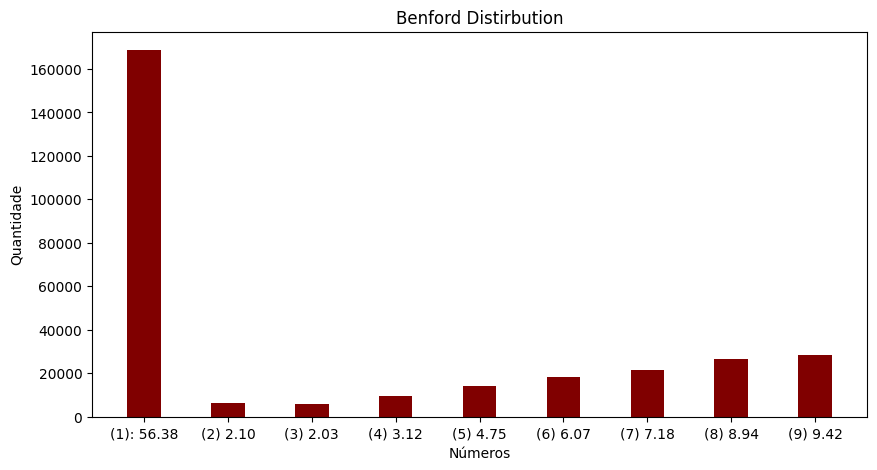

In [95]:
# data = {'1':df_lula_1.size,
#         '2':df_lula_2.size,
#         '3':df_lula_3.size,
#         '4':df_lula_4.size,
#         '5':df_lula_5.size,
#         '6':df_lula_6.size,
#         '7':df_lula_7.size,
#         '8':df_lula_8.size,
#         '9':df_lula_9.size}

labels = ['(1): %.2f' %percent_lula_1,
        '(2) %.2f' %percent_lula_2,
        '(3) %.2f' %percent_lula_3,
        '(4) %.2f' %percent_lula_4,
        '(5) %.2f' %percent_lula_5,
        '(6) %.2f' %percent_lula_6,
        '(7) %.2f' %percent_lula_7,
        '(8) %.2f' %percent_lula_8,
        '(9) %.2f' %percent_lula_9]

valores = [df_lula_1.size,
        df_lula_2.size,
        df_lula_3.size,
        df_lula_4.size,
        df_lula_5.size,
        df_lula_6.size,
        df_lula_7.size,
        df_lula_8.size,
        df_lula_9.size]
numbers = list(labels)
amounts = list(valores)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# POR URNA, BOLSONARO

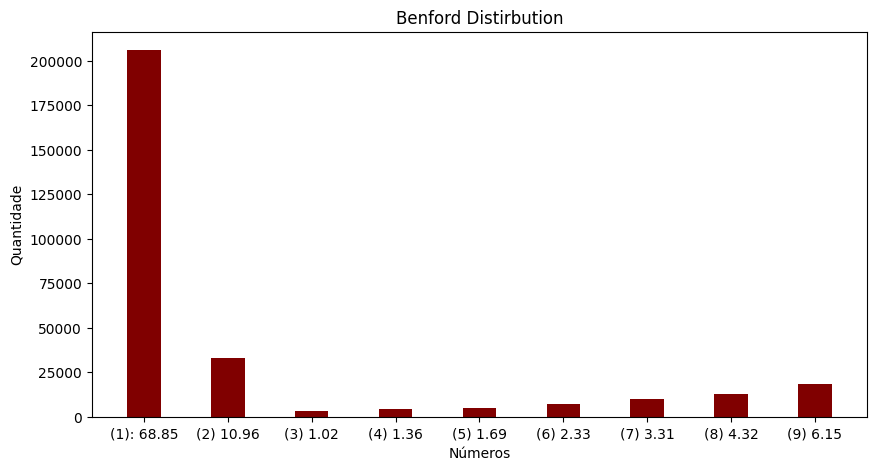

In [105]:
# data = {'1':df_bolsonaro_1.size,
  #         '2':df_bolsonaro_2.size,
  #         '3':df_bolsonaro_3.size,
  #         '4':df_bolsonaro_4.size,
  #         '5':df_bolsonaro_5.size,
  #         '6':df_bolsonaro_6.size,
  #         '7':df_bolsonaro_7.size,
  #         '8':df_bolsonaro_8.size,
  #         '9':df_bolsonaro_9.size}

labels = ['(1): %.2f' %percent_bolsonaro_1,
          '(2) %.2f' %percent_bolsonaro_2,
          '(3) %.2f' %percent_bolsonaro_3,
          '(4) %.2f' %percent_bolsonaro_4,
          '(5) %.2f' %percent_bolsonaro_5,
          '(6) %.2f' %percent_bolsonaro_6,
          '(7) %.2f' %percent_bolsonaro_7,
          '(8) %.2f' %percent_bolsonaro_8,
          '(9) %.2f' %percent_bolsonaro_9]

valores = [df_bolsonaro_1.size,
            df_bolsonaro_2.size,
            df_bolsonaro_3.size,
            df_bolsonaro_4.size,
            df_bolsonaro_5.size,
            df_bolsonaro_6.size,
            df_bolsonaro_7.size,
            df_bolsonaro_8.size,
            df_bolsonaro_9.size]
numbers = list(labels)
amounts = list(valores)

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()